In [2]:
import cv2
import matplotlib.pyplot as plt
from gaze_tracking import GazeTracking,Eye,Pupil,Calibration
import numpy as np

In [3]:
%store -r landmarks
%store -r frame
%store -r points

In [4]:
############################### CHANGED CODE ###################################################
region = np.array([(landmarks.part(point).x, landmarks.part(point).y) for point in points])
region = region.astype(np.int32)
print('1')
height, width,channels = frame.shape[:]  ### CHANGED
black_frame = np.zeros((height, width,channels), np.uint8) ##### CHANGED

mask = np.full((height, width), 255, np.uint8)
cv2.fillPoly(mask, [region], (0, 0, 0))
f=frame.copy()
eye = cv2.bitwise_not(black_frame, f, mask=mask)
print('2')
        # Cropping on the eye
margin = 5
min_x = np.min(region[:, 0]) - margin
max_x = np.max(region[:, 0]) + margin
min_y = np.min(region[:, 1]) - margin
max_y = np.max(region[:, 1]) + margin
print('3')
new_frame = cv2.cvtColor(eye[min_y:max_y, min_x:max_x],cv2.COLOR_BGR2GRAY)  #### CHANGED
print('4')
cv2.imshow("final",new_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

1
2
3
4


In [5]:
kernel = np.ones((3, 3), np.uint8)
a = cv2.bilateralFilter(new_frame, 10, 15, 15)
b = cv2.erode(a, kernel, iterations=3)
pupil_frame = cv2.threshold(b, 70, 255, cv2.THRESH_BINARY)[1]
c=pupil_frame


In [6]:
start=2
stop=100
skip=5

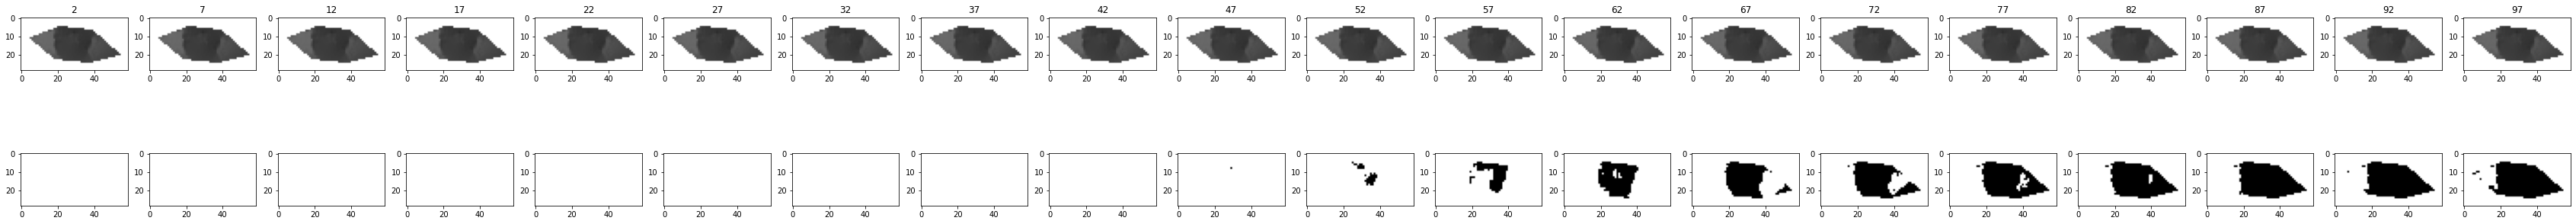

In [7]:
import sys
%matplotlib inline
kernel = np.ones((3, 3), np.uint8)
a = cv2.bilateralFilter(new_frame, 10, 15, 15)
b = cv2.erode(a, kernel, iterations=3)
pupil_frame = cv2.threshold(b, 70, 255, cv2.THRESH_BINARY)[1]
c=pupil_frame

m,n,s=stop,start,skip
no=(m-n)//s+1
a=cv2.cvtColor(a,cv2.COLOR_GRAY2RGB)
fig=plt.figure(figsize=(3*no,3*2))
for i in range(n,m,s):
    a=cv2.cvtColor(a,cv2.COLOR_RGB2GRAY)
    pupil_frame = cv2.threshold(a, i, 255, cv2.THRESH_BINARY)[1]
    pupil_frame=cv2.cvtColor(pupil_frame,cv2.COLOR_GRAY2RGB)
    #print(no,i//s-(n//s-1))
    fig.add_subplot(2,no,i//s-(n//s-1))
    a=cv2.cvtColor(a,cv2.COLOR_GRAY2RGB)
    plt.imshow(a)
    plt.title(i)
    fig.add_subplot(2,no,no-1+i//s-(n//s-2))
    plt.imshow(pupil_frame)
plt.show()